In [1]:
import sys; sys.path.append('..')
import random
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pyzx as zx
import os
import pickle
import numpy as np
import time
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [2]:
def save_obj(obj, name):
    with open('data/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open('data/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [3]:
def c_f(tup):
    return (tup[0]-tup[1]) + 10*tup[1]

def merge_bg(depth, qubits, tprob, bound):
    highbound = load_obj('random/rd_'+str(depth)+'_q_'+str(qubits)+'_t_0.'+str(tprob))
    lowbound = load_obj('random_lowbound/rd_'+str(depth)+'_q_'+str(qubits)+'_t_0.'+str(tprob))
    res = [c_f(highbound['sim_annealing_post']), c_f(highbound['simulated_annealing_simp'])]
    if bound > -15:
        res.append(c_f(highbound['greedy_simp_neighbors_c'+str(bound)]))
        res.append(c_f(highbound['greedy_simp_c'+str(bound)+'_b_False']))
        res.append(c_f(highbound['random_simp_c'+str(bound)+'_b_False']))
    else:
        res.append(c_f(lowbound['greedy_simp_neighbors_c'+str(bound)]))
        res.append(c_f(lowbound['greedy_simp_c'+str(bound)+'_b_False']))
        res.append(c_f(lowbound['random_simp_c'+str(bound)+'_b_False']))
    return res

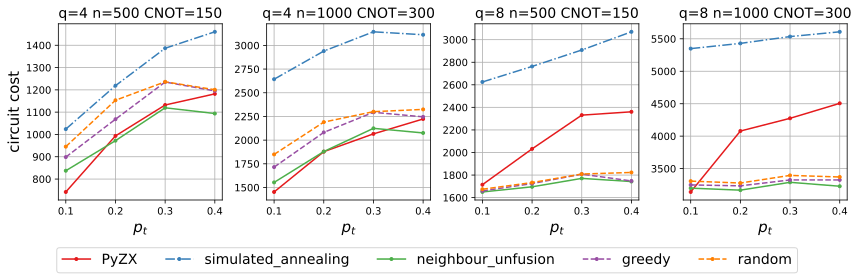

In [8]:
params = [[[500,4,[1,1,-10,-20]],[1000,4,[1,1,-10,-20]],[500,8,[-10,-10,-10,-10]],[1000,8,[-20,-20,-10,-10]]]]
names = ['PyZX','simulated_annealing','neighbour_unfusion','greedy','random']
xs = ['0.1','0.2','0.3','0.4']
colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00']
styles = ['-','-.','-','--','--']
fig, axs = plt.subplots(len(params), len(params[0]), figsize=(12,3.5))

for i in range(0,len(params)):
    for j in range(0,len(params[i])):
        axs[j].set_title('q='+str(params[i][j][1])+' n='+str(params[i][j][0])+' CNOT='+str(int(params[i][j][0]*0.3)),fontsize=14)
        yys = [merge_bg(params[i][j][0],params[i][j][1],tprob,params[i][j][2][tprob-1]) for tprob in range(1,5)]
        for k, ys in enumerate(list(zip(*yys))):
            axs[j].plot(xs, ys, c=colors[k], marker="o",markersize=3, linestyle=styles[k], label=names[k] if i==0 and j == 0 else '')
        axs[j].grid()
        axs[j].set_xlabel('$p_t$', fontsize=15)
#         dep = params[i][j][0]
#         orig_cost = (dep-dep*0.3) + dep*3
#         axs[j].axhline(y=orig_cost, color='red', linestyle='-')
axs[0].set_ylabel('circuit cost', fontsize=15)

plt.figlegend(bbox_to_anchor=(.07, 0), loc='upper left',
          ncol=5, borderaxespad=0,fontsize=14)
# plt.suptitle('Post-Optimization results of $m$ qubit circuits with size $n$ and increasing T Gate probability',fontsize=12)
plt.tight_layout()

plt.show()

In [9]:
fig.savefig(r'/home/korbinian/Documents/master/stau21/Folien/abschlussvortrag/figures/random_compare_to_pyzx.pdf',bbox_inches='tight')